# Ćwiczenia 1
W trakcie ćwiczeń implementowana będzie metoda przeszukiwania - Metoda gradientu prostego.
Celem ćwiczeń jest implementacja metody gradientu prostego dla dwóch funkcji oraz przebadanie wpływu rozmiaru kroku dla różnych (losowych) punktów początkowych. Należy zwizualizować proces minimalizacji na wykresie 2D.

## Punktacja:
 - obliczenie gradientów funkcji 1 pkt
 - implementacja kroku gradientu prostego 1 pkt
 - przeprowadzenie przeszukiwania minimum na obu funkcjach 1 pkt
 - wizualizacja przeszukiwania z wielu miejsc początkowych 1 pkt


In [2]:
from typing import Callable, Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Funkcje do przeszukania:
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(\textbf{x}) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

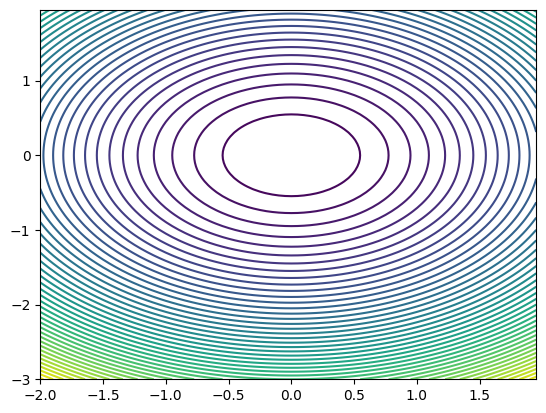

In [3]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 

# Contour plot en 2D
plt.figure()
plt.contour(X, Y, Z, 50)

<class 'numpy.ndarray'>


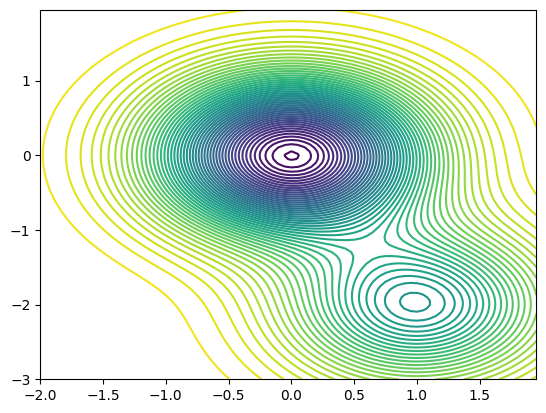

In [4]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.contour(X, Y, Z, 50)

Gradienty funkcji
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [55]:
class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(self,
                 func: Callable[[float, float], float],
                 grad_func: Callable[[float, float], Tuple[float, float]],
                 alpha:float=0.1):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = None  # trace of search

    def _calc_Z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_Z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if self.trace is not None:
            if len(self.trace)>0:
                plt.scatter(self.trace[:,0], self.trace[:,1], s=10, color="red")

    def calculate_func_vale(self, x1:float, x2:float) -> float:
        pass

    def calculate_func_grad(self, x1:float, x2:float) -> Tuple[float, float]:
        return self.grad_func(x1, x2)

    def gradient_descent_step(self, x1:float, x2:float) -> Tuple[float, float]:
        if self.trace is not None:
            return np.array(x1, x2) - self.alpha * np.array(self.calculate_func_grad(x1, x2))
        else:
            return (x1, x2)

    def minimize(self, x1_init:float, x2_init:float, steps:int, verbose:int=0, plot:bool=False)->float:
        for i in range(steps):
            if self.trace is None:
                result = self.gradient_descent_step(x1_init, x2_init)
                self.trace = np.empty((steps, 2))
                self.trace[i, :] = result
            else:
                result = self.gradient_descent_step(self.trace[i-1, 0], self.trace[i-1, 1])
                self.trace[i, :] = result

        #self.trace = self.trace.reshape((2, steps))

# Funkcja 1

# Funkcja 2

In [5]:
X = np.arange(-2, 2, 0.05)

In [14]:
class Function1:
    def __call__(self, X1: np.array, X2: np.array) -> np.array:
        return X1**2 + X2**2
    
    
class Grad1:
    def __call__(self, X1: np.array, X2: np.array) -> Tuple[np.array, np.array]:
        grad = (2*X1, 2*X2)
        return grad

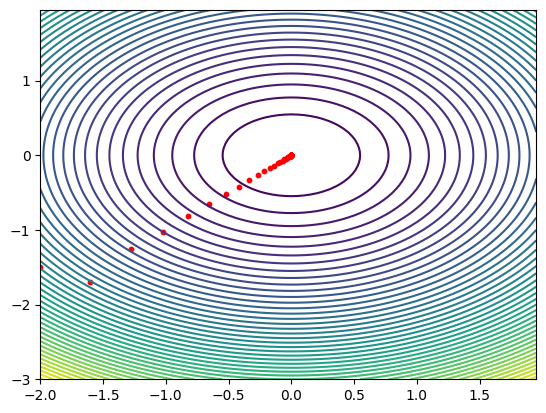

In [56]:
function1 = Function1()
grad1 = Grad1()
gradient = SimpleGradientDescent(function1, grad1)
gradient.minimize(-2, -1.5, 100, 0)
gradient.plot_func()

In [31]:
lista = np.empty((2, 10))

In [34]:
lista[:, 1] = (5, 1)

In [35]:
lista

array([[ 0.1 ,  5.  ,  0.2 ,  0.25,  0.3 ,  0.4 ,  0.5 ,  0.6 ,  0.8 ,
         1.  ],
       [ 1.5 ,  1.  ,  2.5 ,  3.  ,  4.  ,  5.  ,  6.  ,  8.  , 10.  ,
        15.  ]])